In [7]:
import matplotlib.pyplot as plt
import pandas as pd



In [8]:
# Since we can't directly extract the data from the image, we'll need to manually input it.
# This is a placeholder for the data, we'll manually input the data in the same order as the image.
data = {
    'Dataset': [
        'MNLI', 'QQP', 'SST', 'WGrande', 'IMDB', 'HSwag', 'SocialIQA', 'CosQA', 'SciTail', 
        'Argument', 'CSQA', 'BoolQ', 'MRPC', 'SICK', 'RTE', 'CB'
    ],
    'ST-A': [
        84.32, 90.59, 91.85, 61.09, 93.85, 38.11, 62.41, 60.01, 93.90,
        77.65, 58.91, 75.66, 85.16, 86.20, 71.04, 86.07
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

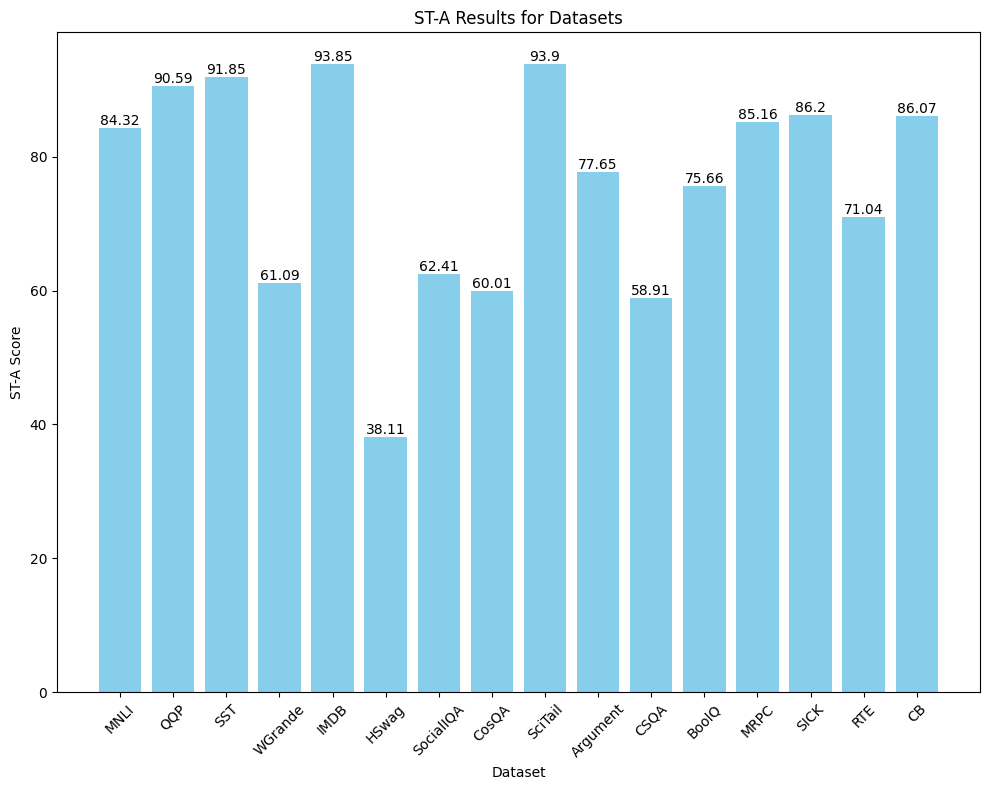

In [11]:
# Plotting
plt.figure(figsize=(10,8))
bars = plt.bar(df['Dataset'], df['ST-A'], color='skyblue')
plt.xlabel('Dataset')
plt.ylabel('ST-A Score')
plt.title('ST-A Results for Datasets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom', ha='center')

plt.xticks(rotation=45)  # Rotate the x labels so they don't overlap
plt.tight_layout()  # Adjust the layout to make room for the x labels

# Show the plot
plt.show()

In [18]:
from pathlib import Path
import json
import ast

def txt_to_dict(file_path):
    with open(file_path, "r") as file:
        # Read the file content
        file_content = file.read()
        # Safely evaluate the string as a Python literal
        data = ast.literal_eval(file_content)
    return data

def txt_to_dict(file_path):
    contents = []
    with open(file_path, "r") as file:
        # Read the file content line by line
        lines = file.readlines()
        # Assuming the dictionary is always on the first line
        # and the rest of the file contains other information.
        #dict_line = lines[0]
        for line in lines:
            if "}" in line:
                a,b = line.split("}")
                contents.append(a)
                contents.append(b)
            else:
                contents.append(line)
        # Attempt to evaluate the first line as a literal
        #try:
            #data = ast.literal_eval(dict_line)
        #except SyntaxError as e:
            #print(f"Error parsing dictionary from file {file_path}: {e}")
            #data = None
    accuracy_lines = [line.rstrip('\n').strip() for line in contents if 'eval_accuracy' in line]
    accuracy_line = accuracy_lines[0].split("= ")[-1]

    return accuracy_line

path = "C:/Users/Hector Auvinen/Desktop/eval_results/bigger_eval_steps/output_adapter_redf_2/"
res_path = Path(path)
def json_to_dict(file_path):
    with open(file_path, "r") as json_file:
        data = json.load(json_file)
    return data

for file in res_path.iterdir():
    if file.is_file() and "eval_results" in str(file):
        res = txt_to_dict(file)
        print(res)

0.7379204892966361
0.8928571428571429
0.8676470588235294
0.6570397111913358
0.8666666666666667
